# Import libaries 

In [1]:
#pip install hvplot

In [2]:
import pandas as pd
import numpy as np
import panel as pn
import re
from sklearn.preprocessing import MultiLabelBinarizer

from bokeh.palettes import  Category20
pn.extension('tabulator')
import hvplot.pandas
import holoviews as hv

hv.extension('bokeh')
import hvplot.pandas

2023-01-26 22:54:18,882 WARNING: panel.io.resources - Mimetype declaration for .js files was set to 'text/plain'. This will interefere with serving JS modules. Ensure your system does not override the mimetype declaration and/or contact your system administrator. 


# Data preprocessing

In [3]:
df = pd.read_csv('movies.csv',index_col="index")

In [4]:
df.columns

Index(['movie_name', 'year_of_release', 'category', 'run_time', 'genre',
       'imdb_rating', 'votes', 'gross_total'],
      dtype='object')

In [5]:
df.head()

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
index,,,,,,,,
1.0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",$134.97M
2.0,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
3.0,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
4.0,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",$28.34M
5.0,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",$44.02M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 99 entries, 1.0 to 99.0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_name       99 non-null     object 
 1   year_of_release  99 non-null     object 
 2   category         99 non-null     object 
 3   run_time         99 non-null     object 
 4   genre            99 non-null     object 
 5   imdb_rating      99 non-null     float64
 6   votes            99 non-null     object 
 7   gross_total      98 non-null     object 
dtypes: float64(1), object(7)
memory usage: 7.0+ KB


In [7]:
df["year_of_release"] = df.year_of_release.apply(lambda x: int(''.join(re.findall(r'[0-9]',str(x)))))
df["run_time"]=df["run_time"].apply(lambda x: int(''.join(re.findall(r'[0-9]',str(x)))))
df["votes"]=df["votes"].apply(lambda x: int(''.join(re.findall(r'[0-9]',str(x)))))
df["category"]=df["category"].apply(lambda x: str(x))
g=df["gross_total"].apply(lambda x: (''.join(re.findall(r'[0-9.]',str(x)))))
df["gross_total"]=  pd.to_numeric(g)

In [8]:
df

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
index,,,,,,,,
1.0,The Godfather,1972,R,175,"Crime, Drama",9.2,1860471,134.97
2.0,The Silence of the Lambs,1991,R,118,"Crime, Drama, Thriller",8.6,1435344,130.74
3.0,Star Wars: Episode V - The Empire Strikes Back,1980,PG,124,"Action, Adventure, Fantasy",8.7,1294805,290.48
4.0,The Shawshank Redemption,1994,R,142,Drama,9.3,2683302,28.34
5.0,The Shining,1980,R,146,"Drama, Horror",8.4,1025560,44.02
...,...,...,...,...,...,...,...,...
95.0,The Usual Suspects,1995,R,106,"Crime, Drama, Mystery",8.5,1087832,23.34
96.0,Cool Hand Luke,1967,GP,127,"Crime, Drama",8.1,178888,16.22
97.0,Eternal Sunshine of the Spotless Mind,2004,R,108,"Drama, Romance, Sci-Fi",8.3,1011004,34.40


In [9]:
df["genre"]= [x.replace(" ","").split(',') for x in df["genre"]]


In [10]:
mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('genre')),
                index=df.index,
                columns=mlb.classes_))

In [11]:
for i in mlb.classes_:
    df[str(i)] = df[str(i)].values.to_dense().astype(np.int64)
#print(df.dtypes)

In [12]:
df["gross_total"] = df["gross_total"] .fillna(df["gross_total"] .mean()) 

In [13]:
df[df["category"]== "Passed"]

,movie_name,year_of_release,category,run_time,imdb_rating,votes,gross_total,Action,Adventure,Animation,...,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
index,,,,,,,,,,,,,,,,,,,,,
18.0,Some Like It Hot,1959,Passed,121,8.2,269346,25.000000,0,0,0,...,0,0,1,0,0,1,0,0,0,0
27.0,Gone with the Wind,1939,Passed,238,8.2,317621,198.680000,0,0,0,...,0,0,0,0,0,1,0,0,1,0
66.0,To Have and Have Not,1944,Passed,100,7.8,35528,117.426531,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Define Panel widgets

In [14]:
year_slider = pn.widgets.IntRangeSlider(name='Year release of film ',width=250, start=1972, end=2015,  value=(2000, 2016), value_throttled=(2000, 2015))
year_slider


IntRangeSlider(end=2015, name='Year release of film ', start=1972, value=(2000, 2016), value_end=2016, value_start=2000, width=250)

In [15]:
# Radio buttons for category measures
category_of_film = pn.widgets.CheckButtonGroup(
    name='category of film', 
    value= ["R"],
    options=["R","PG","G" ,"Approved" ,"PG-13","Passed",],
       button_type='success'

)
category_of_film

CheckButtonGroup(button_type='success', name='category of film', options=['R', 'PG', 'G', ...], value=['R'])

In [16]:

gendre_film = pn.widgets.Select(
    name='Genre of film', 
    value= "Action",
    options=['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
        'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western',]
)
gendre_film 

Select(name='Genre of film', options=['Action', 'Adventure', ...], value='Action')

In [17]:
run_time_slider = pn.widgets.IntRangeSlider(
    name='duration of film(min)', start=45, end=200, value=(50, 120),
    step=5)

run_time_slider

IntRangeSlider(end=200, name='duration of film(min)', start=45, step=5, value=(50, 120), value_end=120, value_start=50)

In [18]:
vote_slider = pn.widgets.IntRangeSlider(
    name='votes for film', start=10748, end=max(df.votes) ,value=(10000, 200000),
    step=100)
vote_slider

IntRangeSlider(end=2683302, name='votes for film', start=10748, step=100, value=(10000, 200000), value_end=200000, value_start=10000)

In [19]:
min(df.votes)

10748

In [20]:
gros_total_slider = pn.widgets.EditableRangeSlider(
    name='total amount of film', start=min(df.gross_total), end=max(df.gross_total) ,value=(5, 500),step=100)
gros_total_slider

EditableRangeSlider(end=936.66, name='total amount of film', start=0.02, step=100, value=(5, 500), width=300)

In [21]:
rating_slider = pn.widgets.IntSlider(name='rate of film', start=3, end=10, step=1, value=5)
rating_slider

IntSlider(end=10, name='rate of film', start=3, value=5)

In [22]:
# plot bar 0
@pn.depends(year_slider.param.value_throttled)
def plot_bar(year):
    years_df = df[(df.year_of_release > year[0]) & (df.year_of_release <= year[1])]
    
    barh_table= years_df[["gross_total","year_of_release","movie_name"]]
    return barh_table.sort_values("gross_total").hvplot.barh("year_of_release","gross_total",title="Year of release VS Total amount ", color="#EE799F" ,legend= "bottom_right", width=400 ,height=400)
   


In [23]:
# plot bar 1
cate= ["R","PG","G" ,"Approved" ,"PG-13","Passed",]
@pn.depends(category_of_film.param.value)
def plot_bar_1(cat):
    
    cat_df=df.loc[df['category'].isin(category_of_film.value)]
    #print(category_of_film.value)
    scatter_table= cat_df[["category","imdb_rating","movie_name","run_time"]]
    return scatter_table.sort_values("imdb_rating").hvplot("category","imdb_rating",by="run_time", kind= "scatter" ,alpha=0.8,
                                                               
                                                                title= "Category VS Rating By Duration",
                                                                hover_cols=["category","imdb_rating","movie_name"],
                                                                width=500 ,legend= "top", height=400 )
   


In [24]:
#hvexplorer = hvplot.explorer(df)
#hvexplorer

In [27]:
# plot bar 2

@pn.depends(year_slider.param.value_throttled)
def plot_bar_2(year):
  
    years_df = df[(df.year_of_release > year[0]) & (df.year_of_release <= year[1])]
   
    table=  years_df[["year_of_release","votes",'imdb_rating',"movie_name"]]
    return table.sort_values("votes").hvplot.table(columns=["year_of_release","votes",'imdb_rating',"movie_name"] ,
                                                                hover_cols=["vote","movie_name"],title= "Table of Year of  release ,name, vote and rate",
                                                                width=500 ,legend= "bottom_right", height=400)
   


In [28]:
# plot bar 3

@pn.depends(category_of_film.param.value,gendre_film.param.value)
def plot_bar_3(cat,gen):
  
    
    catt=df.loc[df['category'].isin(category_of_film.value)]
   # cat_df=df.loc[df[str(gendre_film.value)]]
 
    a=str(gendre_film.value)
    #print(catt[a])
    return  catt.hvplot(a,"imdb_rating",by="category",kind="bar", hover_cols=["imdb_rating","movie_name"],title= "gender VS category VS rating",
                                                                width=500 ,legend= "bottom_right", height=400)
   


In [29]:
# plot bar 4
@pn.depends(run_time_slider.param.value_throttled)
def plot_bar_4(run):
  

    run_df = df[(df.run_time > run[0]) & (df.run_time <= run[1])]
  
   # cat_df=df.loc[df[str(gendre_film.value)]]
    line_table=  run_df[["movie_name","imdb_rating","run_time"]].sort_values("imdb_rating",ascending=False).head(10)
   
  
   
    return line_table.hvplot(x="movie_name" ,y=["run_time","imdb_rating"], size =5, 
                                                                hover_cols=["imdb_rating"], subplots=True,rot=30,color=	"#009ACD" ,
                                                                width=300 ,legend= "bottom_right", height=400,shared_axes=False)

In [30]:
# plot bar 5

@pn.depends(run_time_slider.param.value_throttled,gros_total_slider.param.value_throttled,vote_slider.param.value_throttled)
def plot_bar_5(run,tot,vote):
  

    run_df = df[(df.run_time > run[0]) & (df.run_time <= run[1])]
  
   # cat_df=df.loc[df[str(gendre_film.value)]]
    bar_table=  run_df[["movie_name","imdb_rating","run_time"]].sort_values("imdb_rating",ascending=False).head(10)
   
  
   
    return df.hvplot(y=["gross_total","votes","run_time"], size =5, kind= "density" 
                                                              , subplots=True,rot=20,color ="#E9967A",
                                                                width=200 ,legend= "bottom_right", height=400,shared_axes=False)

# Creating Dashboard

Row(sizing_mode='stretch_width')
    [0] WidgetBox(align='center', height=1000, sizing_mode='fixed', width=300)
        [0] Markdown(str)
        [1] Markdown(str)
        [2] JPG(str, height=200, sizing_mode='fixed', width=300)
        [3] Markdown(str)
        [4] Markdown(str)
        [5] IntRangeSlider(end=2015, name='Year release of film ', start=1972, value=(2000, 2016), value_end=2016, value_start=2000, width=250)
        [6] CheckButtonGroup(button_type='success', name='category of film', options=['R', 'PG', 'G', ...], value=['R'])
        [7] Select(name='Genre of film', options=['Action', 'Adventure', ...], value='Action')
        [8] IntRangeSlider(end=200, name='duration of film(min)', start=45, step=5, value=(50, 120), value_end=120, value_start=50)
        [9] EditableRangeSlider(end=936.66, name='total amount of film', start=0.02, step=100, value=(5, 500), width=300)
        [10] IntSlider(end=10, name='rate of film', start=3, value=5)
        [11] IntRangeSlider(end=2683302, name='votes for film', start=10748, step=100, value=(10000, 200000), value_end=200000, value_start=10000)
        [12] Spacer(margin=200)
        [13] Markdown(str)
    [1] WidgetBox
        [0] Row
            [0] Column(margin=(0, 1), sizing_mode='stretch_width', width=500)
                [0] ParamFunction(function)
            [1] Column(margin=(0, 1), sizing_mode='stretch_width', width=500)
                [0] ParamFunction(function)
            [2] Column(margin=(0, 1), sizing_mode='stretch_width', width=500)
                [0] ParamFunction(function)
        [1] Row
            [0] Column(sizing_mode='stretch_width', width=500)
                [0] ParamFunction(function)
            [1] Column(margin=(0, 1), sizing_mode='stretch_width', width=500)
                [0] ParamFunction(function)
            [2] Column(margin=(0, 1), sizing_mode='stretch_width', width=500)
                [0] ParamFunction(function)
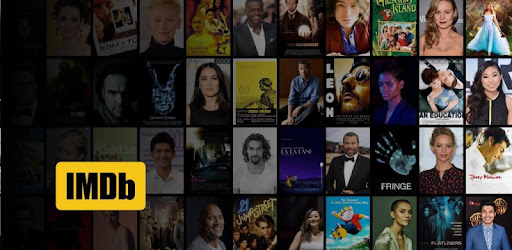

In [31]:
title = "# IMDb Top 100 Movies dashboard"
sous_titre = '### This dashboard aims to analyse the data and to see it in differents ways '
logo = pn.panel("imdb.jpg", width=300,height=200 ,align="start")
text = "IMDb Top 100 is the list of highest rated movies of all time. \n The list ranges of films is between  1972 to 2015. \n There are 100 Rows and 20 Columns in the Dataset."
setting=" ## Settings"
# Header box
header_box = pn.WidgetBox(title, sous_titre,logo,text, setting,year_slider,  category_of_film , gendre_film,run_time_slider,gros_total_slider,rating_slider,vote_slider,pn.layout.Spacer(margin=200), text, width=300, height=1000, align="center")
# Plot Box
plots_box = pn.WidgetBox(pn.Row (pn.Column(plot_bar,align="start",  width=500 ,margin=(0,1) ,sizing_mode="stretch_width"),
                                pn.Column(plot_bar_1,align="start",  width=500,  margin=(0,1) ,sizing_mode="stretch_width"),
                                pn.Column(plot_bar_4,align="start",  width=500,  margin=(0,1) ,sizing_mode="stretch_width")
                                 ),
                                
                         pn.Row(pn.Column(plot_bar_2,align="start",  width=500 ,sizing_mode="stretch_width"),
                                pn.Column(plot_bar_3,align="start",  width=500,  margin=(0,1) ,sizing_mode="stretch_width"),
                                pn.Column(plot_bar_5,align="start",  width=500,  margin=(0,1) ,sizing_mode="stretch_width")))
# Dashboard
dashboard = pn.Row(header_box, plots_box, sizing_mode="stretch_width")
dashboard.servable()